# MLP - Multilayer Perceptron
* Objetivo: treinar uma rede Deep MLP com duas camadas e centenas de neurônios;
* Base de dados: Fashion MNIST (https://keras.io/api/datasets/fashion_mnist/).

## Sobre a base de dados Fashion MNIST:


* 70.000 imagens em escala de cinza, cada uma com dimensões 28x28 pixels;
* 60.000 para treino (X_train);
* 10.000 para teste (X_test);
* 10 classes de roupas:

  0.   Camiseta/Top;
  1.   Calça
  2.   Suéter
  3.   Vestido
  4.   Casaco
  5.   Sandália
  6.   Camisa;
  7.   Tênis
  8.   Bolsa;
  9.   Bota.

## Bibliotecas e carregamento dos dados

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Pré-processamento (reshape, normalização, one-hot enconding)

In [2]:
# Reshape dos dados (transformando imagem 28x28 em vetor 784)
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

# Normalização
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encoding das classes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Criação do modelo
* Uma camada de entrada com 512 neurônios;
* Camadas ocultas com 256, 128 e 64 neurônios, respectivamente;
* Camada de saída com 10 neurônios.

In [3]:
model = keras.Sequential([
    # Camada de entrada
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Primeira camada oculta
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Segunda camada oculta
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Terceira camada oculta
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Camada de saída
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilação do modelo
* Otimizador Adam;
* Loss function: Categorical Crossentropy.

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Resumo da arquitetura

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Treinamento do modelo
* Número de épocas: 20;
* Batch size: 128.

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6813 - loss: 0.9284 - val_accuracy: 0.8341 - val_loss: 0.4557
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8249 - loss: 0.4915 - val_accuracy: 0.8273 - val_loss: 0.4678
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8448 - loss: 0.4433 - val_accuracy: 0.8568 - val_loss: 0.3920
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8554 - loss: 0.4125 - val_accuracy: 0.8595 - val_loss: 0.3902
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8561 - loss: 0.4032 - val_accuracy: 0.8602 - val_loss: 0.3876
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8585 - loss: 0.3964 - val_accuracy: 0.8671 - val_loss: 0.3678
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8612 - loss: 0.3831 - val_accuracy: 0.8601 - val_loss: 0.3981
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8681 - loss: 0.3697 - val

## Avaliação no conjunto de teste

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nAcurácia no teste: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.3498

Acurácia no teste: 0.8759


## Gráficos do treinamento

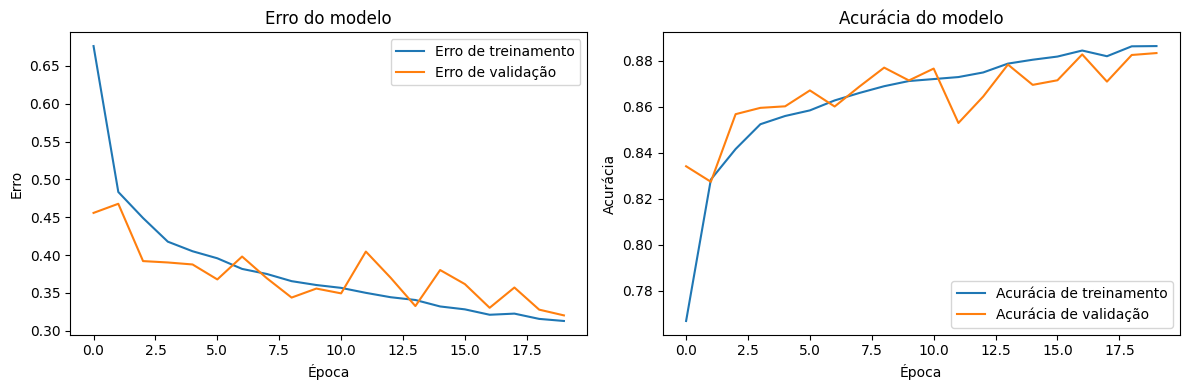

In [10]:
plt.figure(figsize=(12, 4))

# Gráfico de Erro
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Erro de treinamento')
plt.plot(history.history['val_loss'], label='Erro de validação')
plt.title('Erro do modelo')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de validação')
plt.title('Acurácia do modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()